## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Input


def build_mlp(input, output=10, neurons=[512,256,'dp',128], drop_ratio=0.5):
  
  j=0
  input_layer= Input(input)
  for n in neurons:
    if j == 0:
      j+=1
      x = Dense(n, activation='relu', name='hidden_layer'+str(j))(input_layer)
    elif n == 'dp':
      j+=1 
      x = Dropout(drop_ratio)(x)
    else: 
      j+=1
      x = Dense(n, activation='relu', name='hidden_layer'+str(j))(x)
    
    
  output_layer = Dense(output, activation='softmax', name = "output")(x)
  model = Model(inputs=[input_layer], outputs=[output_layer])

   
  return model

In [6]:
"""Code Here
設定超參數
"""
lr= 0.001
epochs = 50
batch_size = 256

drop_ratios = [0.2, 0.3, 0.4, 0.5]
layers = [512, 256,'dp', 128, 'dp']
x_train.shape[1]

3072

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
import warnings
warnings.filterwarnings('ignore')
for dpr in  drop_ratios:
  print(dpr)
  model= build_mlp(x_train.shape[1:], output=10, neurons=layers, drop_ratio=dpr)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size = batch_size, verbose=0)
  results[dpr] = {'train-loss': model.history.history["loss"],'valid-loss': model.history.history["val_loss"], 'train-acc': model.history.history["acc"], 'valid-acc': model.history.history["val_acc"]}

0.2
0.3
0.4
0.5


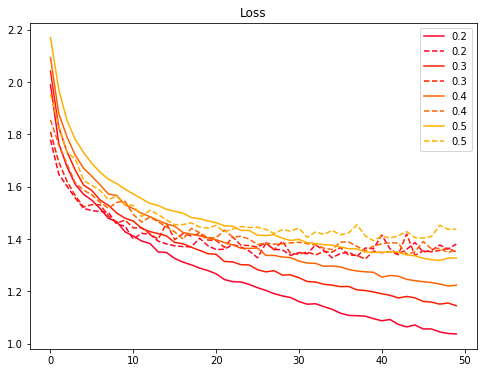

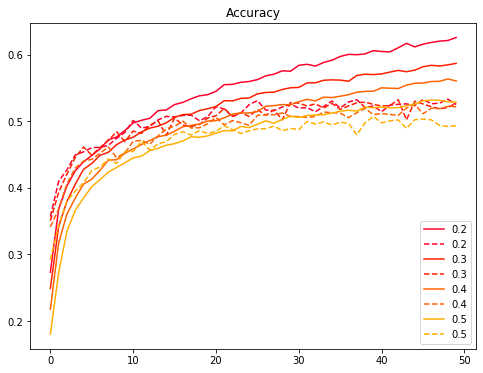

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()